In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [ ]:
Market = pd.read_csv("marketing_campaign.csv", sep ="\t")

In [ ]:
Market['Age'] = pd.Series(np.zeros(Market.shape[0]))
Market.loc[Market['Year_Birth'] <2000, 'Age'] = 2024 - Market['Year_Birth']
Market

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,57.0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,78.0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,43.0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,68.0


In [ ]:
Market['Dt_Customer'] = pd.to_datetime(Market['Dt_Customer'], format='%d-%m-%Y')
reference_date = datetime.now()


# Calculate the number of days since 'Dt_Customer'
Market['MemDays'] = (reference_date - Market['Dt_Customer']).dt.days
Market['TotalAmount'] = Market[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

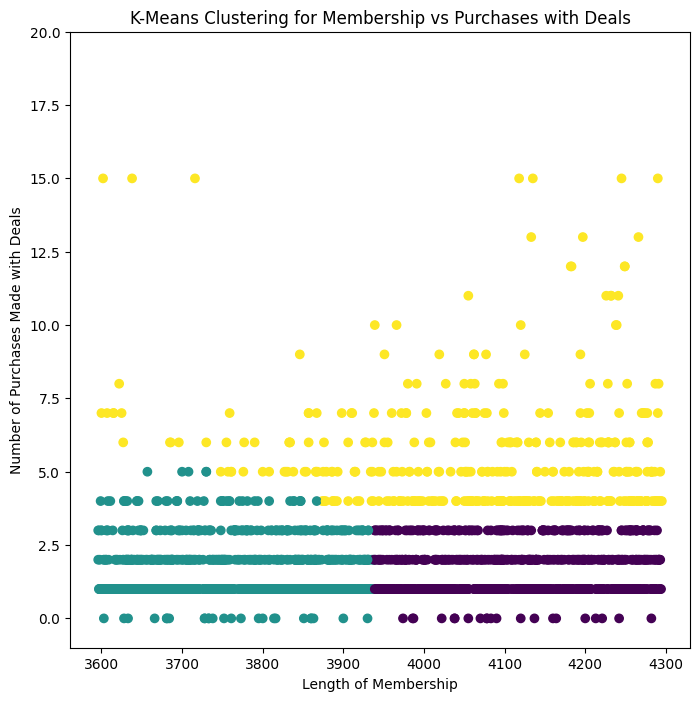

In [ ]:
scaler = StandardScaler()
data_scale = scaler.fit_transform(Market[['MemDays', 'NumDealsPurchases']])
kmeans = KMeans(n_clusters=3, random_state=1, n_init=100).fit(data_scale)
cluster_km = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
cluster_km.index = Market.index

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_ylim(-1, 20)
ax.scatter(Market['MemDays'], Market['NumDealsPurchases'], c=cluster_km['Cluster'], cmap='viridis')
ax.set_title("K-Means Clustering for Membership vs Purchases with Deals")
ax.set_xlabel('Length of Membership')
ax.set_ylabel('Number of Purchases Made with Deals')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=860550e2-e635-4d90-a14f-a0d8a87ba0f0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>